# Bayes exploration

# Diagnosis

In [133]:
# bayes allows you to utilize prior knowledge to explain observations.
# Example: a patient has spots. What you would like to know is, do they have smallpox, or chickenpox.
# you know that 
# 1) p(spots|smallpox) = 0.9  - if you have smallpox, you have a 90% chance of having spots. 
#    Also called likelyhood of smallpox, which is weird, should be likelihood of spots..
# 2) p(spots|chikenpox) = 0.8
# at first glance you would say, ah, the patient is most likely to have smallpox, but no!
# you need to take into consideration the probability of contracting smallpox or chickenpox, this is the prior knowledge
# p(smallpox) = 0.0011, p(chickenpox)= 0.1 
# we also need the marginal liklihood that a person has spots in the general population p(spots) = 0.081
# now we can apply Bayes rule which says:
# p(smallpox|spots) = P(spots|smallpox) * p(smallpox)/p(spots)

In [134]:
pspots_sp = 0.9
pspots_ck = 0.8
psp = 0.0011
pck = 0.1
#pspots = 0.081
pspots = .081

In [135]:
psp_spots = pspots_sp * psp/pspots
pck_spots = pspots_ck * pck/pspots
print(psp_spots, pck_spots, pck_spots + psp_spots)
# why does this work out to a total probability of one? Are there no other reasons to have spots?

0.012222222222222221 0.9876543209876545 0.9998765432098767


# biased coins

In [136]:
# given two coinflips with the same coin, provide a probabilty it is biased towards heads
# p(bheads|p(x)) where X is the result of our two coinflips

# coins are manufactured with biases. this is the:
# Prior Probability of different coin biases
# 75% give a probability of 0.6
# 25% give a probability of 0.4 heads
bheads = 0.75

#first we need the p(x|bheads) called the
# likelihoods of different coin biases
# This is two coinflips which are independent, so 
# p(x|bheads) = p(x1|bheads) * p(x2|bheads)
# in this example x1 will be heads, x2, tails.
px_bheads = 0.6 * 0.4 * 0.4 * 0.4
px_btails = 0.4 * 0.6 * 0.6 * 0.6
mpx = 0.6 * 0.4 # marginal probability.. bogus in this case I think. will cancel in ratio
# now we can compute the Posterior Probability of different coin biases p(bheads|p(x))
pbheads_px = px_bheads * bheads / mpx
pbtails_px = px_btails * (1 - bheads) / mpx
pr_heads = pbheads_px / pbtails_px

In [137]:
print( px_bheads, px_btails, pr_heads)
print ("probability ratio of heads bias vs tail bias {}".format(pr_heads))

0.038400000000000004 0.08639999999999999 1.3333333333333335
probability ratio of heads bias vs tail bias 1.3333333333333335


In [138]:
# a more realistic question: 
# the coin manufacturing produces a bias that has a bell curve
# so then, would you ask, given x flip sequence, what is the most likely bias or show a curve of bias.

In [139]:
# Lets start by creating a random variable with a Normal distribution
# according to the central limit theorem, we should be able to add n random variables together to get 
# new variable that has a Normal distribution.
# the book is using height of a population N as an example, lets shoot for an average of 5ft in height.

In [205]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

rvars = 30
entries = 100000
a = 10 * np.random.rand(rvars,entries) # shoot for an average height of 5 feet
b = np.sum(a,axis=0)/rvars

mu = np.sum(b)/entries # mean of distribution
sigma = np.std(b) # standard deviation of distribution

4.99971059358 0.526957207641


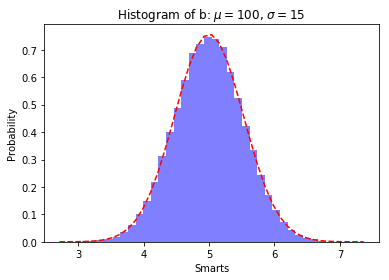

In [206]:
num_bins = 40
# the histogram of the data
n, bins, patches = plt.hist(b, num_bins, normed=1, facecolor='blue', alpha=0.5)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma) #Return the normal pdf evaluated at bins
plt.plot(bins, y, 'r--')

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of b: $\mu=100$, $\sigma=15$')
print(mu, sigma)

[ 5.19283257  5.04297391  5.52822815  4.77192839  5.67943053  4.45133292
  5.90433599  5.39724477  4.92400113  5.70165324]


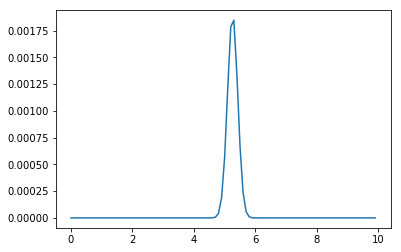

In [211]:
# cool. that works. If you increase the number of random variables in the sum, the sdeviation gets smaller.
# It gets to looking pretty normal after 3 variables however.
# Lets use that as the 'real' height distribution.
# now lets look at the likelhood of mu from a sample from this distribution. (pg 97)
# The goal: take a sample of n random elements and then plot the liklihood of mu for that sample.
# in the book example, they, for some odd reason, assume you have sigma from the real population
n=10
sampidx = np.random.randint(0,entries,n)
x = b[sampidx]
#x = np.ones(1)*mu
print( x)
kpop = 1/(sigma * np.sqrt((2 * np.pi)))

mus = np.linspace(0,9.9,100)
px_u = np.ones(len(mus))
tmp = np.zeros(n)

#print(kpop,x,mus)
for i in range(0,len(mus)):
    px_u[i] = np.product(kpop * np.exp(-np.square(x-mus[i])/(2*np.square(sigma))))
    #print(tmp)
plt.plot(mus,px_u)


In [197]:
# the above looks about right. If you have n=1, it centers around that one value. With large values of n, the
# probability is really small and centers around 0.5 more.
# slighly odd, you would think that the larger n was, the more certain you would be that you are matching mu.
# but, because the prob of each xi is independant, you just multiply then togther, so, the more entries, the 
# smaller it gets. It does get narrower as n increases.

In [198]:
# now, lets look at the Posterior Density Function or the probability of mu given x
# here again, I am Expecting this to increase with more n... lets see



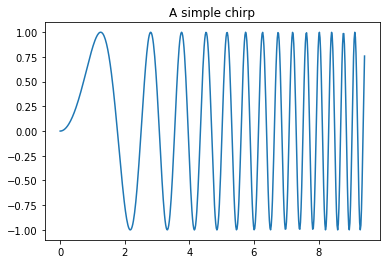

In [199]:
# code I grabbed looking for plotting.. cool
x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp')
plt.show()

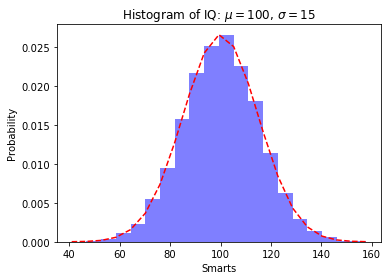

In [194]:
# code I grabbed looking for histogram plotting.. cool
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# example data
mu = 100 # mean of distribution
sigma = 15 # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.5)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()